# Предобработка текста

## Часть 1

### Токенизация

In [ ]:
import nltk
# The Natural Language Toolkit (NLTK) is an open source Python library
# for Natural Language Processing.  A free online book is available.

# data
nltk.download('punkt')

# functions we'll use
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# help(nltk)

While tokenising, we can use words as tokens with `word_tokenize()`.

Note, this is not the same as using `<some string>.split(' ')` method with a `space` as a separator. It also deals with **punctuation**.

In [ ]:
data = "All work and no play makes jack a dull boy, all work and no play"
tokens = word_tokenize(data.lower())
print(tokens)

['all', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy', ',', 'all', 'work', 'and', 'no', 'play']


We can also use sentenses for tokenisation by using `sent_tokenize()`

In [ ]:
print(sent_tokenize("I was going home when she rung. It was a surprise."))

['I was going home when she rung.', 'It was a surprise.']


For Russian text we should use something else since **nltk** will not be enough. We will use [**natasha**](https://github.com/natasha/natasha).

[<img src="https://raw.githubusercontent.com/natasha/natasha-logos/master/natasha.svg">](https://github.com/natasha/natasha)

NLTK does not work for Russian since the alphabet is different.

Instead we will use [Razdel](https://natasha.github.io/razdel/).

In [ ]:
!pip install -q razdel

In [ ]:
from razdel import tokenize, sentenize
text = 'Кружка-термос на 0.5л (50/64 см³, 516;...)'
list(tokenize(text))

[Substring(0, 13, 'Кружка-термос'),
 Substring(14, 16, 'на'),
 Substring(17, 20, '0.5'),
 Substring(20, 21, 'л'),
 Substring(22, 23, '('),
 Substring(23, 28, '50/64'),
 Substring(29, 32, 'см³'),
 Substring(32, 33, ','),
 Substring(34, 37, '516'),
 Substring(37, 38, ';'),
 Substring(38, 41, '...'),
 Substring(41, 42, ')')]

#### Регулярные выражения

Исчерпывающий пост https://habr.com/ru/post/349860/

In [ ]:
import re
word = 'supercalifragilisticexpialidocious'
re.findall('[abc]|up|super', word)

# [abc] matches any of the symbols 'a', 'b', 'c' one by one
# | <=> or
# 'up' matches 'up'
# 'super' matches 'super'

['super', 'c', 'a', 'a', 'c', 'a', 'c']

Order of both characters in the string and options in the regex **matteres**. For exmaple, if we first find '**su**', then we will never find '**super**'.

In [ ]:
re.findall('[abc]|su|super', word)

['su', 'c', 'a', 'a', 'c', 'a', 'c']

In [ ]:
re.findall('\d{1,3}', 'These are some numbers: 49 and 432312')

# \d matches digits
# \d{1, 3} will match from 1 to 3 digits

['49', '432', '312']

Note, regex acts **greedily**, it will only return the largest matches an move on.

In [ ]:
re.findall('\d{1,5}', 'These are some numbers: 49 and 432312')
# 432312 is split into '43231' of length 5 (maximum possible) and '2' - what's left

['49', '43231', '2']

In [ ]:
re.sub(pattern='[,\.?!]', repl='', string='How, to? split. text!')

# substutite (what, whith what, where to do it)
# help(re.sub)

'How to split text'

In [ ]:
re.sub('[^A-z]',' ','I 123 can 45 play 67 football').split()

# ^ means NOT
# [A-z] means all letters capitin both lower and upper cases
# [^A-z] means not letters

# So we substitute 'everything but letters' with a space ' '

# split splists on spaces.

['I', 'can', 'play', 'football']

#### N-граммы

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--466CQV1q--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_66%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/78nf1vryed8h1tz05fim.gif" height=400>

In [ ]:
print('data:\n\t', data, '\n')


print('tokens:\n\t', tokens, '\n')

unigram = list(nltk.ngrams(tokens, 1))
print('unigrams:\n\t', unigram[:5], '\n')

bigram = list(nltk.ngrams(tokens, 2))
print('bigrams:\n\t', bigram[:5], '\n')

data:
	 All work and no play makes jack a dull boy, all work and no play 

tokens:
	 ['all', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy', ',', 'all', 'work', 'and', 'no', 'play'] 

unigrams:
	 [('all',), ('work',), ('and',), ('no',), ('play',)] 

bigrams:
	 [('all', 'work'), ('work', 'and'), ('and', 'no'), ('no', 'play'), ('play', 'makes')] 



In [ ]:
from nltk import FreqDist
print('Популярные униграммы:\n\t', FreqDist(unigram).most_common(5), '\n')
print('Популярные биграммы:\n\t', FreqDist(bigram).most_common(5))

Популярные униграммы:
	 [(('all',), 2), (('work',), 2), (('and',), 2), (('no',), 2), (('play',), 2)] 

Популярные биграммы:
	 [(('all', 'work'), 2), (('work', 'and'), 2), (('and', 'no'), 2), (('no', 'play'), 2), (('play', 'makes'), 1)]


### Удаление неинформативных слов

Usually we would delete irrelevant words, which are commonly known as **stop words**. This list includes 'the' and verbs 'to be'. They do not bring meaning, but are there due to the grammatical rules.

Other words we might want to exclude are the very infrequent words since they might just be typos.

#### Стоп-слова

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopWords = set(stopwords.words('russian'))
print(stopWords)

{'ни', 'мне', 'будто', 'сейчас', 'про', 'нее', 'после', 'зачем', 'эту', 'вам', 'вы', 'меня', 'куда', 'того', 'тот', 'вдруг', 'во', 'или', 'же', 'если', 'тут', 'им', 'даже', 'они', 'этот', 'их', 'где', 'в', 'том', 'лучше', 'ну', 'для', 'более', 'была', 'эти', 'всю', 'себя', 'ведь', 'там', 'но', 'его', 'чтоб', 'на', 'всех', 'сам', 'опять', 'так', 'ты', 'бы', 'наконец', 'можно', 'может', 'раз', 'уж', 'по', 'со', 'она', 'тем', 'без', 'два', 'чем', 'какой', 'под', 'ей', 'из', 'нас', 'уже', 'всегда', 'ним', 'этой', 'вот', 'них', 'ему', 'тебя', 'три', 'никогда', 'моя', 'над', 'впрочем', 'потом', 'у', 'теперь', 'ее', 'был', 'чуть', 'между', 'при', 'чего', 'не', 'да', 'были', 'чтобы', 'я', 'еще', 'быть', 'от', 'вас', 'ничего', 'только', 'ней', 'него', 'что', 'этого', 'до', 'он', 'о', 'когда', 'с', 'какая', 'то', 'перед', 'всего', 'этом', 'совсем', 'конечно', 'тоже', 'а', 'будет', 'мой', 'другой', 'было', 'нет', 'нибудь', 'тогда', 'через', 'все', 'надо', 'об', 'к', 'ли', 'много', 'разве', 'есть'

In [ ]:
stopWords = set(stopwords.words('english'))
print(stopWords)

{'as', 'why', 'or', 'most', 'be', 'hadn', 'both', 'their', 'more', "wouldn't", 'under', 'after', 'over', 'we', 'don', 'to', 'was', "didn't", 'if', 'didn', 'hers', 'once', 'through', 'so', 'should', 'can', 'being', 'having', 'had', 'them', 'then', "that'll", 'ma', 'mightn', "mightn't", 'has', 'while', 'am', 've', "couldn't", 'you', "you'll", 're', 'couldn', 'our', 'does', 'whom', 'from', 'all', "you'd", 'me', 'very', 'nor', 'her', "doesn't", 'is', 'up', 'just', 'shan', 'here', 'isn', 'when', 'did', "shouldn't", 'him', 'each', 'himself', 'out', 'she', 'again', 'its', 'ain', 'few', 'than', "mustn't", 'yourself', 'above', "needn't", 'yours', 'themselves', 'and', 'theirs', 'it', 'he', 'they', "aren't", 'below', 'doesn', 'mustn', 'won', 'in', 'now', 'those', 'of', 'off', 'there', 'were', 'how', 'doing', 'about', 'during', "don't", "should've", 'wasn', 'shouldn', 'aren', 'the', 'no', 'been', 'm', 'itself', 'by', 'too', 'because', 't', "weren't", 'on', 'what', 'this', "it's", 'myself', 'for', 

BUT be careful, we do not want to get rid of the stopwords at all times. For example **'no'** is in english stopwords. Negation really makes a difference to the meaning of the sentence when it comes to some tasks, e.g. recommender systems or classifications of movie reviews.

In [ ]:
'no' in stopWords

True

In [ ]:
print([word for word in tokens if word not in stopWords])

['work', 'play', 'makes', 'jack', 'dull', 'boy', ',', 'work', 'play']


We also might want to get rid punctuation. But some punctuation helps us to find breaks inbetween sentences and shows where the borders between thoughts. So **don't rush** to delete it either. 

In [ ]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


#### Стемминг vs Лемматизация
* ‘Caring’ -> Лемматизация -> ‘Care’
* ‘Caring’ -> Стемминг -> ‘Car’

### Стемминг
* процесс нахождения основы слова (корня) для заданного исходного слова

In [ ]:
from nltk.stem import PorterStemmer, SnowballStemmer
words = ["game", "gaming", "gamed", "games", "compacted"]
words_ru = ['корова', 'мальчики', 'мужчины', 'столом', 'убежала']

In [ ]:
ps = PorterStemmer()
list(map(ps.stem, words))

['game', 'game', 'game', 'game', 'compact']

In [ ]:
ss = SnowballStemmer(language='russian')
list(map(ss.stem, words_ru))

['коров', 'мальчик', 'мужчин', 'стол', 'убежа']

### Лематизация
* процесс приведения словоформы к лемме — её нормальной (словарной) форме - (инфинитиву)

In [1]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""

raw_ru = """Не существует научных доказательств в пользу эффективности НЛП, оно 
признано псевдонаукой. Систематические обзоры указывают, что НЛП основано на 
устаревших представлениях об устройстве мозга, несовместимо с современной 
неврологией и содержит ряд фактических ошибок."""

In [2]:
# this is a rule-based library
!pip install -q pymorphy2

     |████████████████████████████████| 61kB 3.8MB/s 
     |████████████████████████████████| 8.2MB 15.6MB/s 


In [4]:
# 1. pymorphy2 is a rule-based library, everything is 'hard coded' in there
import pymorphy2
morph = pymorphy2.MorphAnalyzer()


# 1) split the sentence into words
# 2) apply the function to each of the words indicidually

#pymorphy_results = list(map(lambda x: morph.parse(x), raw_ru.split(' ')))
pymorphy_results = list(map(lambda x: morph.parse(x), raw.split(' ')))
print(' '.join([res[0].normal_form for res in pymorphy_results]))

dennis: listen, strange women lying in ponds distributing swords
is no basis for a system of government.  supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony.


In [ ]:
pymorphy_results[0]

[Parse(word='не', tag=OpencorporaTag('PRCL'), normal_form='не', score=1.0, methods_stack=((DictionaryAnalyzer(), 'не', 22, 0),))]

In [ ]:
pymorphy_results[2]

[Parse(word='научных', tag=OpencorporaTag('ADJF,Qual plur,gent'), normal_form='научный', score=0.774193, methods_stack=((DictionaryAnalyzer(), 'научных', 12, 21),)),
 Parse(word='научных', tag=OpencorporaTag('ADJF,Qual plur,loct'), normal_form='научный', score=0.209677, methods_stack=((DictionaryAnalyzer(), 'научных', 12, 26),)),
 Parse(word='научных', tag=OpencorporaTag('ADJF,Qual anim,plur,accs'), normal_form='научный', score=0.016129, methods_stack=((DictionaryAnalyzer(), 'научных', 12, 23),))]

Note, there an be multiple outputs for one word. **Normal form** in this context is the infinitiv.

In [6]:
# 2. spacy is learnt. Unlike pymorphy, it uses context.
import spacy
nlp = spacy.load('en') # not available for russian :(
spacy_results = nlp(raw)
print(' '.join([token.lemma_ for token in spacy_results]))

denni : listen , strange woman lie in pond distribute sword 
 be no basis for a system of government .   Supreme executive power derive from 
 a mandate from the masse , not from some farcical aquatic ceremony .


In [9]:
nlp(raw)

DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony.

Note
* lion -> lie

So it's not always good.

[Сравнение PyMorphy2 и PyMystem3](https://habr.com/ru/post/503420/)

1. PyMystem3 takes long to initialize so irreklevant for short texts.
2. But PyMystem3 is faster for large corpuses of text.



### Part-of-Speech

We can use part-of-speach as an extra feature for any word.

In [ ]:
# 1. pymorphy
[(res[0].normal_form, res[0].tag) for res in pymorphy_results[:9]]

[('не', OpencorporaTag('PRCL')),
 ('существовать', OpencorporaTag('VERB,impf,intr sing,3per,pres,indc')),
 ('научный', OpencorporaTag('ADJF,Qual plur,gent')),
 ('доказательство', OpencorporaTag('NOUN,inan,neut plur,gent')),
 ('в', OpencorporaTag('PREP')),
 ('польза', OpencorporaTag('NOUN,inan,femn sing,accs')),
 ('эффективность', OpencorporaTag('NOUN,inan,femn sing,gent')),
 ('нлп,', OpencorporaTag('UNKN')),
 ('оно', OpencorporaTag('NPRO,neut,3per,Anph sing,nomn'))]

In [ ]:
# 2. spacy
[(token.lemma_, token.pos_) for token in spacy_results[:7]]

[('denni', 'NOUN'),
 (':', 'PUNCT'),
 ('listen', 'VERB'),
 (',', 'PUNCT'),
 ('strange', 'ADJ'),
 ('woman', 'NOUN'),
 ('lie', 'VERB')]

In [ ]:
!pip install -q rnnmorph

     |████████████████████████████████| 10.5MB 12.2MB/s 


In [ ]:
# 3. Applies both for English and for Russian
#    Uses trained RNNs.
from rnnmorph.predictor import RNNMorphPredictor

predictor = RNNMorphPredictor(language="ru")
rnnmorph_result = predictor.predict(raw_ru.split(' '))

[(token.normal_form, token.pos, token.tag) for token in rnnmorph_result[:7]]

[('не', 'PART', '_'),
 ('существовать',
  'VERB',
  'Mood=Ind|Number=Sing|Person=3|Tense=Notpast|VerbForm=Fin|Voice=Act'),
 ('научный', 'ADJ', 'Case=Gen|Degree=Pos|Number=Plur'),
 ('доказательство', 'NOUN', 'Case=Gen|Gender=Neut|Number=Plur'),
 ('в', 'ADP', '_'),
 ('польза', 'NOUN', 'Case=Acc|Gender=Fem|Number=Sing'),
 ('эффективность', 'NOUN', 'Case=Gen|Gender=Fem|Number=Sing')]

### Named entities recognition

""

In [ ]:
doc = nlp('Apple is looking at buying U.K. startup for $1 billion')

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


ORG - organisation

GPE - geopolitical entity

MONEY - money


Note, here using `.lower()` will actually make it worse.

**Main takeaway: there is no magical solution, we need to use what works for a particular problem.**

## Часть 2

### Задача классификации

#### 20 newsgroups
Датасет с 18000 новостей, сгруппированных по 20 темам.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

In [ ]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
newsgroups_train.filenames.shape

(11314,)

#### Рассмотрим подвыборку

In [ ]:
categories = ['alt.atheism', 'talk.religion.misc',
              'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      categories=categories)
newsgroups_train.filenames.shape

(2034,)

In [ ]:
print(newsgroups_train.data[0])

From: rych@festival.ed.ac.uk (R Hawkes)
Subject: 3DS: Where did all the texture rules go?
Lines: 21

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

Rycharde Hawkes				email: rych@festival.ed.ac.uk
Virtual Environment Laboratory
Dept. of Psychology			Tel  : +44 31 650 3426
Univ. of Edinburgh			Fax  : +44 31 667 0150



In [ ]:
newsgroups_train.target[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1])

#### TF-IDF(напоминание)

$n_{\mathbb{d}\mathbb{w}}$ - число вхождений слова $\mathbb{w}$ в документ $\mathbb{d}$ aka **term frequency**; <br>

$N_{\mathbb{w}}$ - число документов, содержащих $\mathbb{w}$;<br>
$N$ - число документов; <br><br>

$p(\mathbb{w}, \mathbb{d}) = N_{\mathbb{w}} / N$ - вероятность наличия слова $\mathbb{w}$ в любом документе $\mathbb{d}$ aka **document frequency**

$\implies$

**Inverse Document Frequency** is naturally $ N / N_{\mathbb{w}} $

<br>
$P(\mathbb{w}, \mathbb{d}, n_{\mathbb{d}\mathbb{w}}) = (N_{\mathbb{w}} / N)^{n_{\mathbb{d}\mathbb{w}}}$ - вероятность встретить $n_{\mathbb{d}\mathbb{w}}$ раз слово $\mathbb{w}$ в документе $\mathbb{d}$.<br><br>

$-\log{P(\mathbb{w}, \mathbb{d}, n_{\mathbb{d}\mathbb{w}})} = n_{\mathbb{d}\mathbb{w}} \cdot \log{(N / N_{\mathbb{w}})} = TF(\mathbb{w}, \mathbb{d}) \cdot IDF(\mathbb{w})$<br><br>

$TF(\mathbb{w}, \mathbb{d}) = n_{\mathbb{d}\mathbb{w}}$ - term frequency;<br>
$IDF(\mathbb{w}) = \log{(N /N_{\mathbb{w}})}$ - inverted document frequency, log is an increasing function, so it has the same order as $N /N_{\mathbb{w}}$;


**The greater we have TFIDF for word $\mathbb{w}$ in document $\mathbb{d}$, the more importent this word is for the document.**

#### Давайте векторизуем эти тексты с помощью TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#### Некоторые параметры: 
* input : string {‘filename’, ‘file’, ‘content’}
*  lowercase : boolean, default True
*  preprocessor : callable or None (default)
*  tokenizer : callable or None (default)
*  stop_words : string {‘english’}, list, or None (default)
*  ngram_range : tuple (min_n, max_n)
*  max_df : float in range [0.0, 1.0] or int, default=1.0
*  min_df : float in range [0.0, 1.0] or int, default=1
*  max_features : int or None, default=None

#### Перебор параметров

We have 2034 documents.

In [ ]:
len(newsgroups_train.data)

2034

In [ ]:
# lowercase
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(2034, 34118)

We have 34118 **unique** words if we put them all in **lower case**.

In [ ]:
vectorizer = TfidfVectorizer(lowercase=False)
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(2034, 42307)

We have 42307 **unique** words if we **keep the cases**.

In [ ]:
vectorizer.get_feature_names()[:10]

['00',
 '000',
 '0000',
 '00000',
 '000000',
 '000005102000',
 '000021',
 '000062David42',
 '0000VEC',
 '0001']

This are not the kind of words we are interested in.

In [ ]:
# min_df, max_df
vectorizer = TfidfVectorizer(min_df=0.8) # only use the terms for which the document frequency is 0.8 or higher
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(2034, 9)

We ger 9 words which occur in 80% of more of documents.

In [ ]:
vectorizer.get_feature_names()

['and', 'from', 'in', 'lines', 'of', 'organization', 'subject', 'the', 'to']

The usual subjects:
* and
* in
* of
* the
* to

Where do the rest come from?
* from
* lines
* organisation
* subject

In [ ]:
print(newsgroups_train.data[0])

From: rych@festival.ed.ac.uk (R Hawkes)
Subject: 3DS: Where did all the texture rules go?
Lines: 21

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

Rycharde Hawkes				email: rych@festival.ed.ac.uk
Virtual Environment Laboratory
Dept. of Psychology			Tel  : +44 31 650 3426
Univ. of Edinburgh			Fax  : +44 31 667 0150



Well, if we have a look at the data, we have a pattern.

*From*: ...

Subject: ...

*Lines*: ...

At the beginning of the file. And we have "*organisation*" in some of the other files.

**Decision:** let's **get rid of them** and also not include the **very unfrequent words** which occure in $<= 10\%$ of the documents. 

In [ ]:
vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.8) # only allow words with 0.01 <= document_frequency <= 0.8
vectors = vectorizer.fit_transform(newsgroups_train.data)
print("n_documents, n_words", vectors.shape)

42307 - 2391

n_documents, n_words (2034, 2391)


39916

We **lost** 39916 words:
* 9 **very frequent** words
* 39907 **unfrequent** words

In [ ]:
# ngram_range - same as the previous since we only consider 1-grams (unigrams)
vectorizer = TfidfVectorizer(ngram_range=(1, 1), min_df=0.01, max_df=0.8)
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(2034, 2391)

In [ ]:
# ngram_range - consider 1, 2, and 3-grams
vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=0.01, max_df=0.8)
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(2034, 5181)

More "words" are available since 1-grams covered all the words and we just added the pairs.

In [ ]:
# ngram_range - consider 1, 2, and 3-grams
vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=0.03, max_df=0.9)
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(2034, 1236)

By **reducing the range** of document frequncies allowed from below, we are considering **less** n-grams.

In [ ]:
# стоп-слова, preproc
import nltk
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

nltk.download('wordnet')
wnl = nltk.WordNetLemmatizer() # not very good, but fast

def preproc_nltk(text):
    #text = re.sub(f'[{string.punctuation}]', ' ', text)
    return ' '.join([wnl.lemmatize(word) for word in word_tokenize(text.lower()) if word not in stopWords])

st = "Oh, I think I ve landed Where there are miracles at work,  For the thirst and for the hunger Come the conference of birds"
preproc_nltk(st)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


'oh , think landed miracle work , thirst hunger come conference bird'

In [ ]:
%%time
vectorizer = TfidfVectorizer(preprocessor=preproc_nltk)
vectors = vectorizer.fit_transform(newsgroups_train.data)

CPU times: user 9.95 s, sys: 7.72 ms, total: 9.96 s
Wall time: 10 s


In [ ]:
# preproc_spacy
nlp = spacy.load("en_core_web_sm")
texts = newsgroups_train.data.copy()

def preproc_spacy(text):
    spacy_results = nlp(text)
    return ' '.join([token.lemma_ for token in spacy_results if token.lemma_ not in stopWords])
preproc_spacy(st)

'oh , -PRON- think -PRON- land miracle work ,   thirst hunger come conference bird'

In [ ]:
%%time
new_texts = []
for doc in nlp.pipe(texts, batch_size=32, n_process=3, disable=["parser", "ner"]):
    new_texts.append(' '.join([tok.lemma_ for tok in doc if tok.lemma not in stopWords]))
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(new_texts)

CPU times: user 30 s, sys: 379 ms, total: 30.4 s
Wall time: 1min 46s


In [ ]:
print(newsgroups_train.data[0])

From: rych@festival.ed.ac.uk (R Hawkes)
Subject: 3DS: Where did all the texture rules go?
Lines: 21

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

Rycharde Hawkes				email: rych@festival.ed.ac.uk
Virtual Environment Laboratory
Dept. of Psychology			Tel  : +44 31 650 3426
Univ. of Edinburgh			Fax  : +44 31 667 0150



In [ ]:
 print(new_texts[0])

from : rych@festival.ed.ac.uk ( R Hawkes ) 
 subject : 3ds : where do all the texture rule go ? 
 line : 21 

 hi , 

 -PRON- have notice that if -PRON- only save a model ( with all -PRON- mapping plane 
 position carefully ) to a .3DS file that when -PRON- reload -PRON- after restart 
 3ds , -PRON- be give a default position and orientation .   but if -PRON- save 
 to a .prj file -PRON- position / orientation be preserve .   do anyone 
 know why this information be not store in the .3DS file ?   nothing be 
 explicitly say in the manual about save texture rule in the .prj file . 
 -PRON- would like to be able to read the texture rule information , do anyone have 
 the format for the .prj file ? 

 be the .cel file format available from somewhere ? 

 rych 

 = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
 Rycharde Hawkes 				 email : rych@festival.ed.ac.uk 
 Virtual Environment Laboratory 
 D

**Spacy** has **higher quality**, but is **slower** then **nltk**.

#### Итоговая модель

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), # 1, 2, and 3-grams concidered
                             max_df=0.5,         # do not take the words which are in more than 50% of documents
                             max_features=1000   # take 1000 best features if there are so many, othw. take all
                             )


vectors = vectorizer.fit_transform(new_texts)
vectorizer.get_feature_names()[::100]

['000',
 'au',
 'christ',
 'even',
 'if pron have',
 'matter',
 'over',
 'quote',
 'still',
 'truth']

#### Можем посмотреть на косинусную меру между векторами

In [ ]:
vector = vectors.todense()[0]
(vector != 0).sum()

50

For 

In [ ]:
vector.shape

(1, 1000)

In [ ]:
np.mean(list(map(lambda x: (x != 0).sum(), vectors.todense())))

93.63765978367748

On average we have about 94 words from our 1000 words dictianary of features.

In [ ]:
import numpy as np
from numpy.linalg import norm

type(vectors)

scipy.sparse.csr.csr_matrix

In [ ]:
dense_vectors = vectors.todense()
dense_vectors.shape

(2034, 1000)

Remember, we have 2034 text documents.

Now each one is encoded in 1000 features.

In [ ]:
def cosine_sim(v1, v2):
    # v1, v2 (1 x dim)
    return np.array(v1 @ v2.T / norm(v1) / norm(v2))[0][0]

In [ ]:
cosine_sim(dense_vectors[0], dense_vectors[0])

1.0000000000000002

In [ ]:
cosines = []
for i in range(10):
    cosines.append(cosine_sim(dense_vectors[0], dense_vectors[i]))

In [ ]:
# [1, 3, 2, 0, 2, 0, 2, 1, 2, 1]
cosines

[1.0000000000000002,
 0.043294587352860875,
 0.005869835524491915,
 0.0935800085948649,
 0.042441093346628496,
 0.04763556598669193,
 0.038723466540658134,
 0.22771527506874503,
 0.03289646848736767,
 0.06184884190504455]

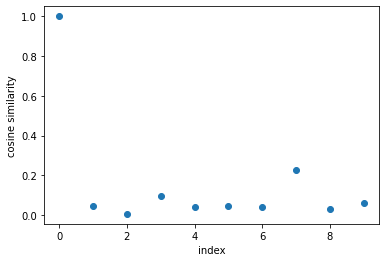

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x = range(len(cosines)), y = cosines)
plt.xlabel('index')
plt.ylabel('cosine similarity')
plt.show()

Note, the document at index 7 is actually from the same topic as the topic at index 0, to which we were comparing.

#### Обучим любую известную модель на полученных признаках

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.linear_model import SGDClassifier

X_train, X_test, y_train, y_test= train_test_split(dense_vectors, newsgroups_train.target, test_size=0.2, random_state=0)
y_train.shape, y_test.shape

((1627,), (407,))

In [ ]:
%%time
svc = svm.SVC()
svc.fit(X_train, y_train)

CPU times: user 5 s, sys: 10.6 ms, total: 5.01 s
Wall time: 5.04 s


In [ ]:
accuracy_score(y_test, svc.predict(X_test))

0.9213759213759214

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
accuracy_score(y_test, sgd.predict(X_test))

0.8992628992628993

### Embeddings

We try two embeddings:
* `embeddings_pretrained` - pretrained on twitter data
* `embeddings_trained` - we train ourselves on our data

#### Pre-trained embedding

In [ ]:
import gensim.downloader as api
embeddings_pretrained = api.load('glove-twitter-25')

[====================================--------------] 72.2% 75.6/104.8MB downloaded


In [ ]:
print("number of words embedded:", len(embeddings_pretrained.index2word))

number of words embedded: 1193514


In [ ]:
print("examples of words:\n\t", embeddings_pretrained.index2word[::100000])

examples of words:
	 ['<user>', 'ناكل', 'ซึงรี', 'jajajajajajaajajaj', 'عقليّ', 'تفيضُ', 'あげた', 'nnメリークリスマス', 'metterli', 'hamsterku', 'iklanrakyat', 'ぐぐる']


#### Training our embedding

In [ ]:
from gensim.models import Word2Vec

proc_words = [preproc_nltk(text).split() for text in newsgroups_train.data]
proc_words

embeddings_trained = Word2Vec(proc_words, # data for model to train on
                 size=100,                # embedding vector size
                 min_count=3,             # consider words that occured at least 3 times
                 window=3).wv             # we look at 2 words to the left and 2 words to the right

In [ ]:
len(embeddings_trained.index2word)

13651

In [ ]:
print("examples of words:\n\t", embeddings_trained.index2word[::1365])

examples of words:
	 [',', 'load', 'enviroleague', 'ignored', 'workable', 'wager', 'fork', 'eq', 'walt', 'samelovich', 'neie']


#### Define vectorization

In [ ]:
def vectorize_sum(comment, embeddings):
    """
    implement a function that converts preprocessed comment to a sum of token vectors
    """
    embedding_dim = embeddings.vectors.shape[1]
    features = np.zeros([embedding_dim], dtype='float32')

    for word in preproc_nltk(comment).split():
        if word in embeddings:
            features += embeddings[f'{word}']
    
    return features

### Make data with pre-trained embedding and fit Logistic regression to it.



In [ ]:
X_wv = np.stack([vectorize_sum(text, embeddings_pretrained) for text in newsgroups_train.data])
X_train_wv, X_test_wv, y_train, y_test = train_test_split(X_wv, newsgroups_train.target, test_size=0.2, random_state=0)
X_train_wv.shape, X_test_wv.shape

((1627, 25), (407, 25))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

clf = LogisticRegression(max_iter=5000)
wv_model = clf.fit(X_train_wv, y_train)
accuracy_score(y_test, wv_model.predict(X_test_wv))

0.7100737100737101

### Make data with the embedding we trained ourselves and fit Logistic regression to it.


In [ ]:
X_wv = np.stack([vectorize_sum(text, embeddings_trained) for text in newsgroups_train.data])
X_train_wv, X_test_wv, y_train, y_test = train_test_split(X_wv, newsgroups_train.target, test_size=0.2, random_state=0)
X_train_wv.shape, X_test_wv.shape

((1627, 100), (407, 100))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

clf = LogisticRegression(max_iter=10000)
wv_model = clf.fit(X_train_wv, y_train)
accuracy_score(y_test, wv_model.predict(X_test_wv))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8378378378378378

**Q:** Why do we have lower quality for the embedded input than for the TFIDF input?

**A:** We only used 25 or 32 features when embedding the documents. For TF-IDF we used 1000 features. 25 and 32 features are not enough. To have better accuracy we need to get more features from the emeddings. The rule of thumb is to have between 200 and 300.